## composite theta-normal slices for cylindrical coordinates 

This notebooks demonstrates one way to take a yt dataset in cylindrical coordinates and create composite theta-normal slices that cover both sides of the origin. 

### demonstrate the problem 

load in some test data, add derived fields for the cartesian x and y positions

In [1]:
import yt 
from yt.testing import fake_amr_ds
import numpy as np

In [2]:
ds = fake_amr_ds(geometry='cylindrical')

def _x(field, data):
    return data['index', 'r'] * np.cos(data['index', 'theta'])

def _y(field, data):
    return data['index', 'r'] * np.sin(data['index', 'theta'])

ds.add_field(
    ('index', 'xvals'), 
    _x, 
    'cell',
    take_log=False,)

ds.add_field(
    ('index', 'yvals'), 
    _y, 
    'cell', 
    take_log=False,
    )

yt : [INFO     ] 2024-04-05 11:16:30,465 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-05 11:16:30,466 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-04-05 11:16:30,466 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-04-05 11:16:30,466 Parameters: domain_right_edge         = [1.         1.         6.28318531]
yt : [INFO     ] 2024-04-05 11:16:30,467 Parameters: cosmological_simulation   = 0


When you plot a theta-normal slice at theta=0:

yt : [WARNING  ] 2024-04-05 11:16:30,505 Field ('index', 'xvals') was added without specifying units or dimensions, auto setting units to 'cm'
yt : [INFO     ] 2024-04-05 11:16:30,509 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:30,509 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:30,509 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-04-05 11:16:30,511 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:30,511 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:30,515 Making a fixed resolution buffer of (('index', 'xvals')) 800 by 800



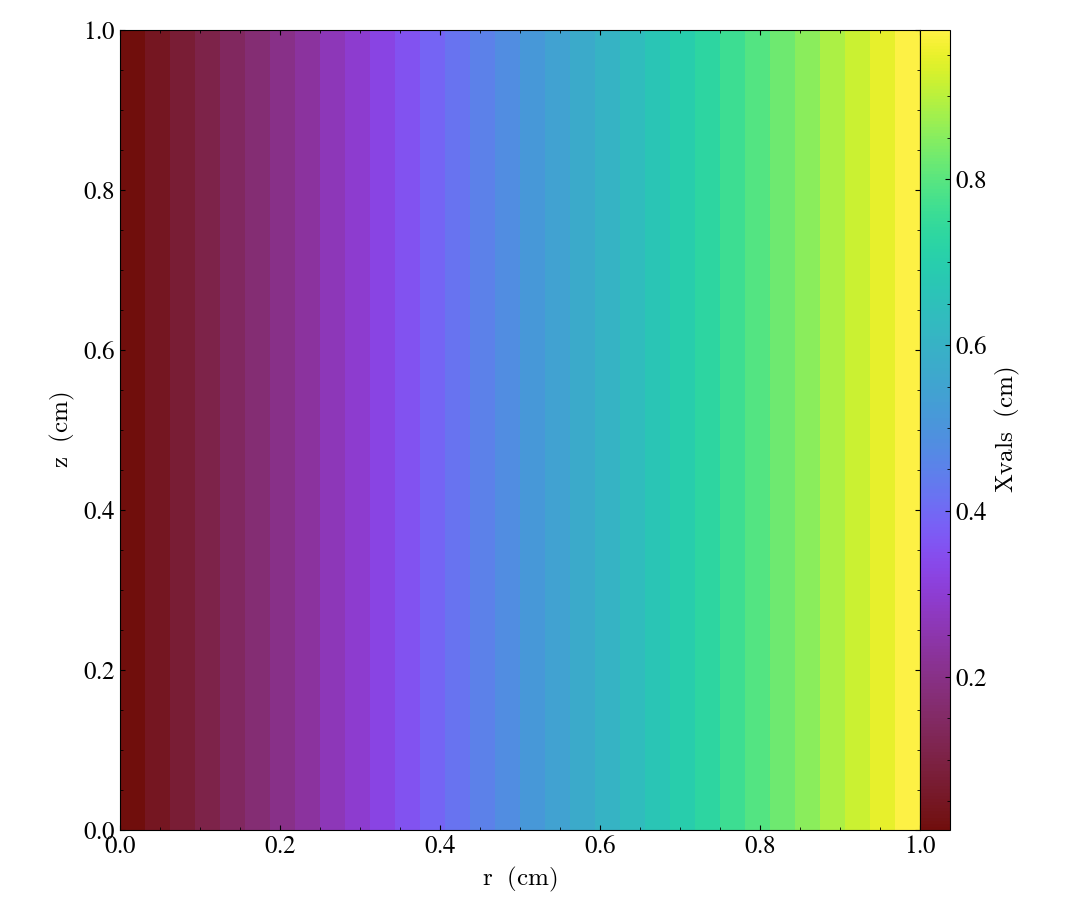

In [3]:
c = ds.domain_center.copy()
c[ds.coordinates.axis_id['theta']] = 0.0
yt.SlicePlot(ds, 'theta', ('index', 'xvals'), center = c)

that r axis corresponds to the +x axis. 

To get the -x axis, you can slice at np.pi:

yt : [INFO     ] 2024-04-05 11:16:31,039 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,040 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,040 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-04-05 11:16:31,041 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,041 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,042 Making a fixed resolution buffer of (('index', 'xvals')) 800 by 800



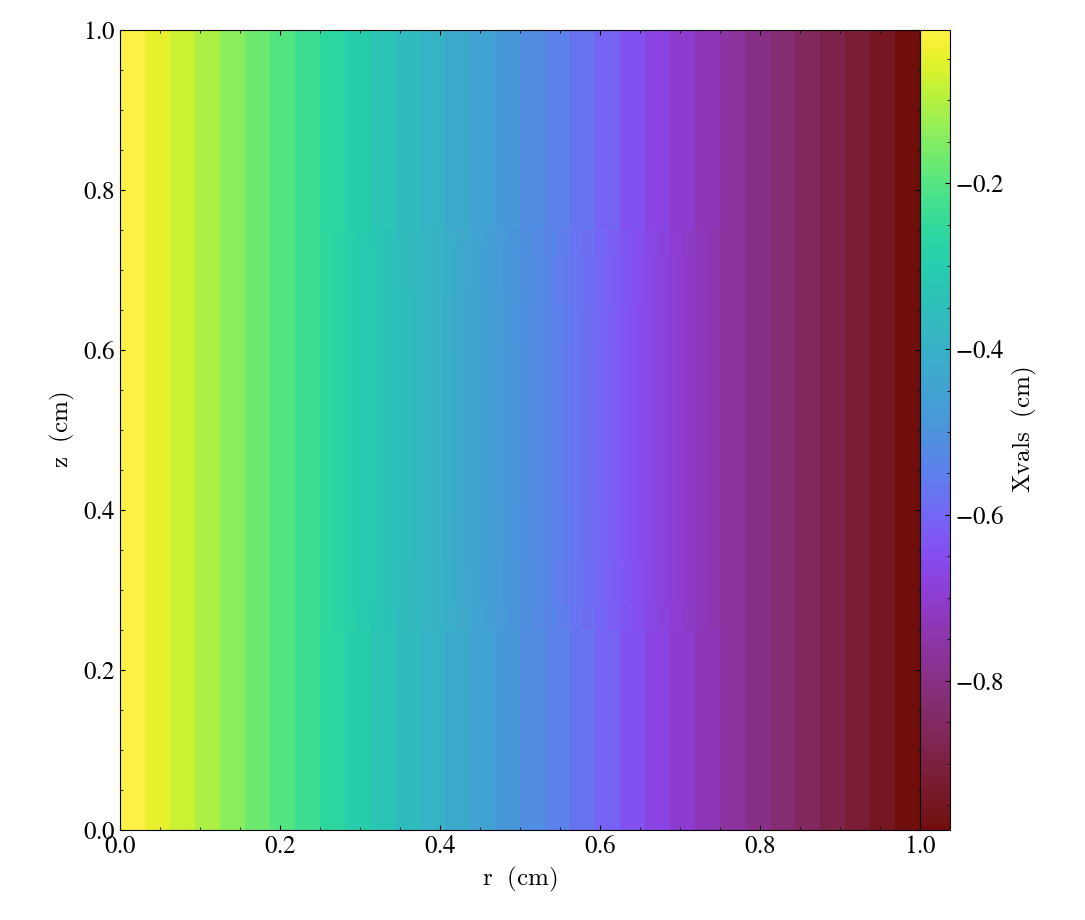

In [4]:
c = ds.domain_center.copy()
c[ds.coordinates.axis_id['theta']] = np.pi
yt.SlicePlot(ds, 'theta', ('index', 'xvals'), center = c)

same for the y values at pi/2 and 3pi/2:

yt : [WARNING  ] 2024-04-05 11:16:31,296 Field ('index', 'yvals') was added without specifying units or dimensions, auto setting units to 'cm'
yt : [INFO     ] 2024-04-05 11:16:31,296 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,296 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,296 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-04-05 11:16:31,298 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,298 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,298 Making a fixed resolution buffer of (('index', 'yvals')) 800 by 800



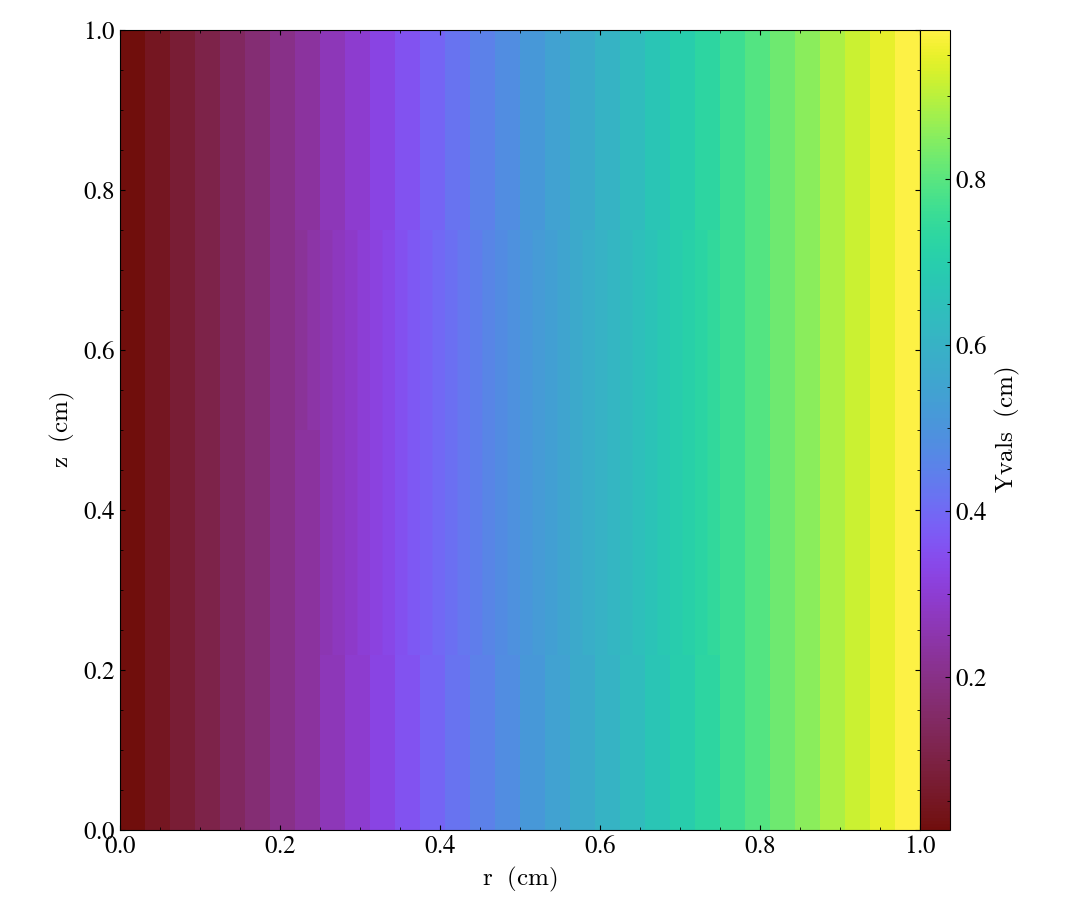

In [5]:
c = ds.domain_center.copy()
c[ds.coordinates.axis_id['theta']] = np.pi/2
yt.SlicePlot(ds, 'theta', ('index', 'yvals'), center = c)

yt : [INFO     ] 2024-04-05 11:16:31,556 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,556 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,557 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-04-05 11:16:31,558 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,558 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,559 Making a fixed resolution buffer of (('index', 'yvals')) 800 by 800



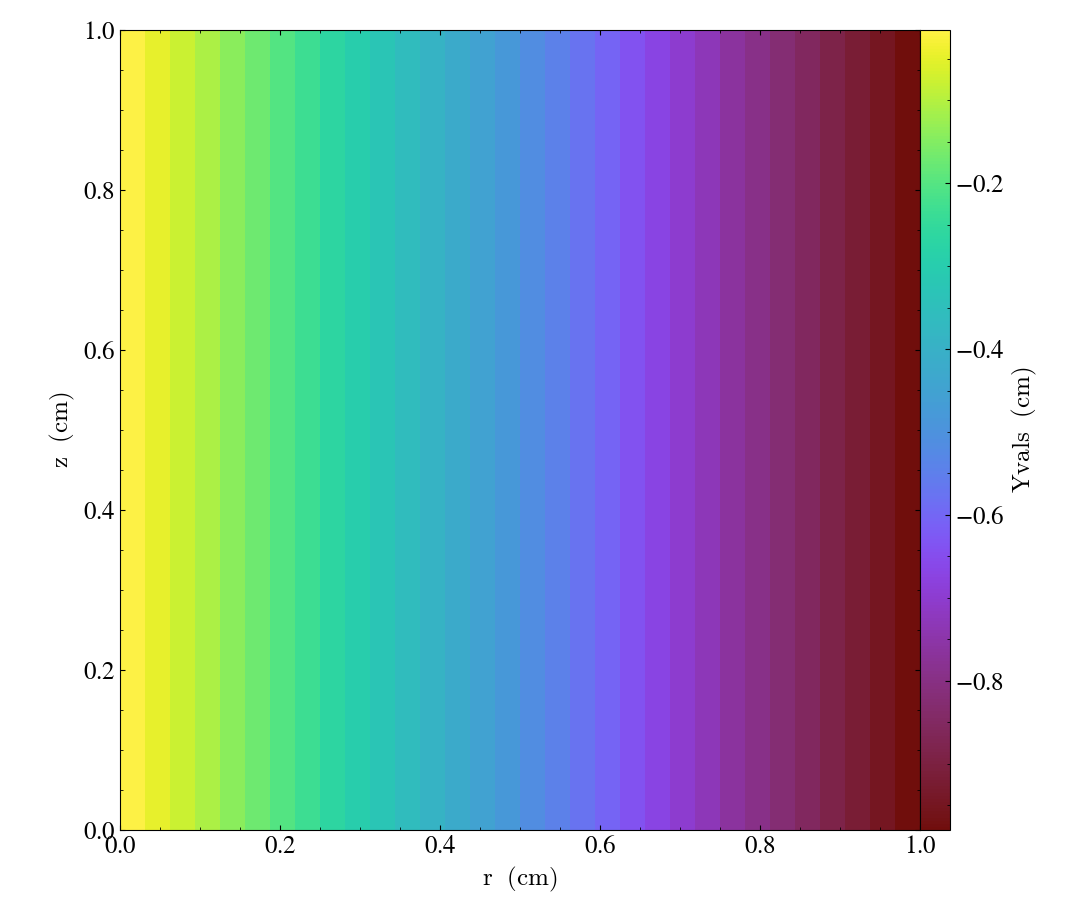

In [6]:
c = ds.domain_center.copy()
c[ds.coordinates.axis_id['theta']] = 3*np.pi/2
yt.SlicePlot(ds, 'theta', ('index', 'yvals'), center = c)

at intermediate theta values, to get "both sides" of the origin, we can create the first slice at the theta of interest, then offset by pi to get the other side

yt : [INFO     ] 2024-04-05 11:16:31,806 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,807 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,807 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-04-05 11:16:31,809 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,809 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:31,809 Making a fixed resolution buffer of (('index', 'yvals')) 800 by 800



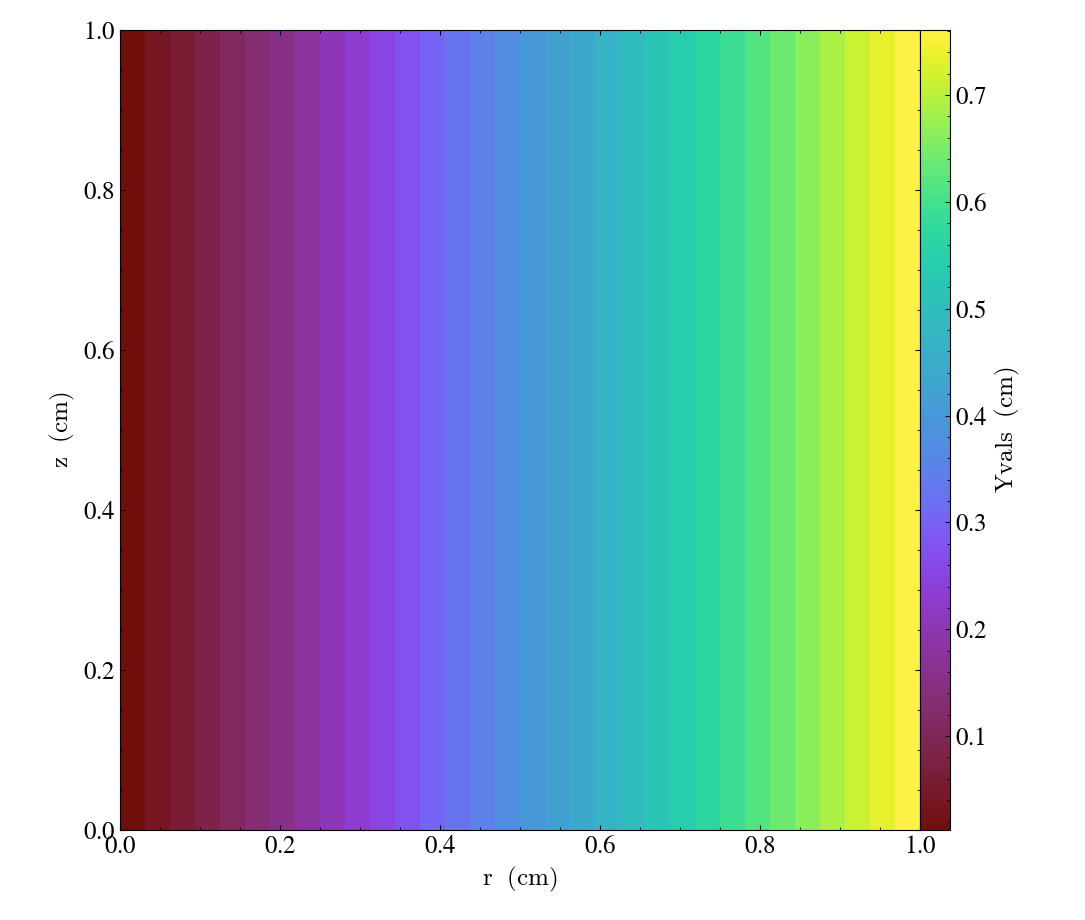

In [7]:
c = ds.domain_center.copy()
theta_1 = np.pi/4
c[ds.coordinates.axis_id['theta']] = theta_1
yt.SlicePlot(ds, 'theta', ('index', 'yvals'), center = c)

yt : [INFO     ] 2024-04-05 11:16:32,076 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,076 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,076 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-04-05 11:16:32,078 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,078 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,078 Making a fixed resolution buffer of (('index', 'yvals')) 800 by 800



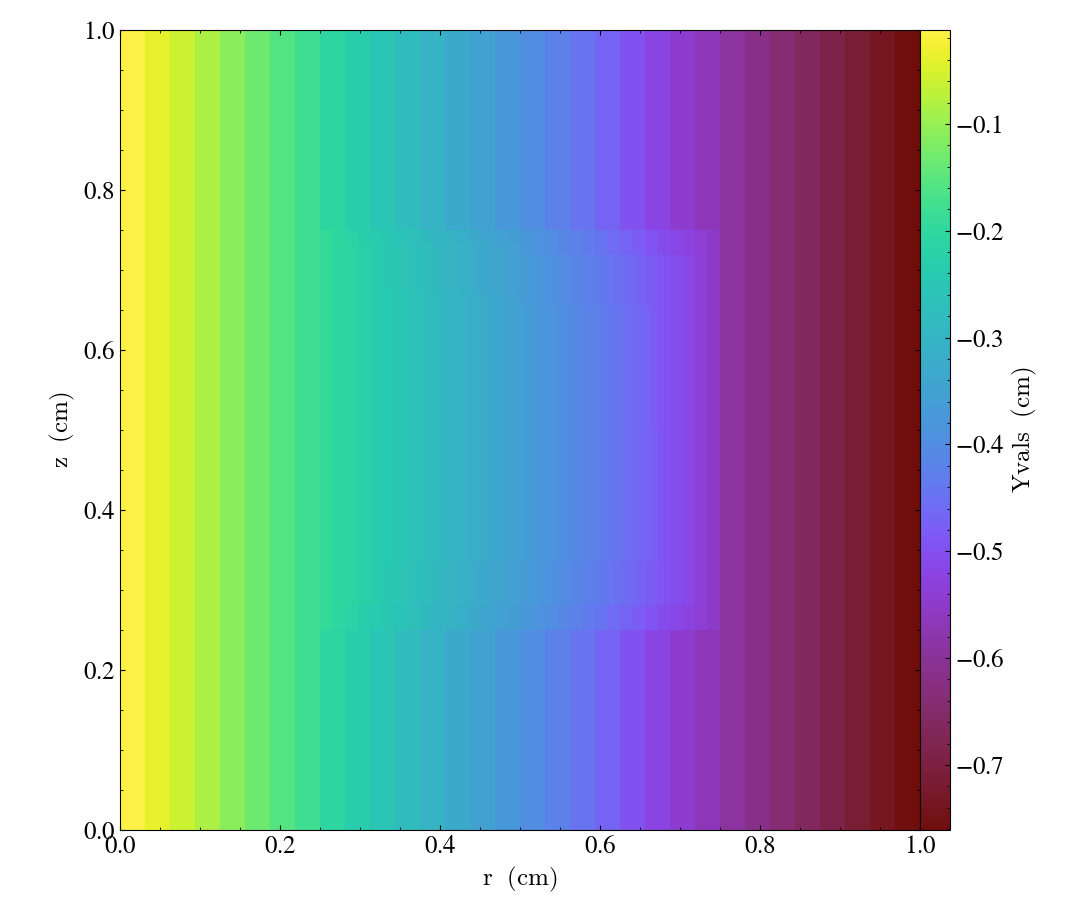

In [8]:
c = ds.domain_center.copy()
theta_2 = theta_1 + np.pi
c[ds.coordinates.axis_id['theta']] = theta_2
yt.SlicePlot(ds, 'theta', ('index', 'yvals'), center = c)

so what we want is to create a composite of those two images. We can do this by extracting the Fixed Resolution Buffer of both images and adjusting the extent of the image. 

The following function takes a ds, a field to plot and the first theta angle and returns a composite image buffer for the first theta angle and that angle + pi. 

Note that the composite image follows a viewing angle convention such that the image's +x coordinate points along the r axis at the first theta value.

In [9]:
def theta_normal_slice_composite(ds, field, theta, **kwargs):
    """ 
    create a composite image buffer of two theta-normal slices.

    The first slice is taken at theta_1 = theta, the 
    second slice at theta_2 = theta + pi. 

    Parameters
    ----------
    ds : the yt dataset (in cylindrical coordiantes)
    field : the field to plot 
    theta : the first theta value of interest, should be < pi
    **kwargs: passed along to SlicePlot

    Returns:
    --------
    composite_frb, composite_extent

    composite_frb: an image array covering both sides of the origin 
    composite_extent: the image extent of the composite 

    
    """
    
    slice_frbs = []
    slice_bounds = []
    xy_min = np.inf
    xy_max = -np.inf
    
    for slc_id, theta_offset in enumerate((0., np.pi)):
        # the current theta value 
        theta_val = np.mod(theta + theta_offset, 2*np.pi)

        # set the slice center and get the slice
        c = ds.domain_center.copy()
        c[ds.coordinates.axis_id['theta']] = theta_val
        slc = yt.SlicePlot(ds, 'theta', field, center = c, **kwargs)

        # extract the image array
        frb_vals = slc.frb[field]
        bounds = np.array(slc.bounds)
        if slc_id == 1:
            # flip the bounds and frb values for the second slice
            bounds[:2] = -1 * bounds[:2]
            frb_vals = np.fliplr(frb_vals)

        slice_frbs.append(frb_vals)
        # track the extents
        xy_min = np.min([xy_min, np.min(bounds[0:2])])
        xy_max = np.max([xy_max, np.max(bounds[0:2])])
        z_bounds = bounds[2:]

    # stack the two buffers, reversing the list order so that the 
    # first image is aligned with the image's -x direction
    composite_frb = np.column_stack(slice_frbs[::-1])
    composite_extent = (xy_min, xy_max, z_bounds[0], z_bounds[1])
    
    return composite_frb, composite_extent

In [10]:
frb, extent = theta_normal_slice_composite(ds, ('index', 'xvals'), 0.0)

yt : [INFO     ] 2024-04-05 11:16:32,350 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,350 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,351 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-04-05 11:16:32,352 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,352 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,352 Making a fixed resolution buffer of (('index', 'xvals')) 800 by 800
yt : [INFO     ] 2024-04-05 11:16:32,427 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,428 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,428 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-04-05 11:16:32,429 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,429 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,430 Making a fixed resolution buffer of (('index', 'xvals')) 800 by 800


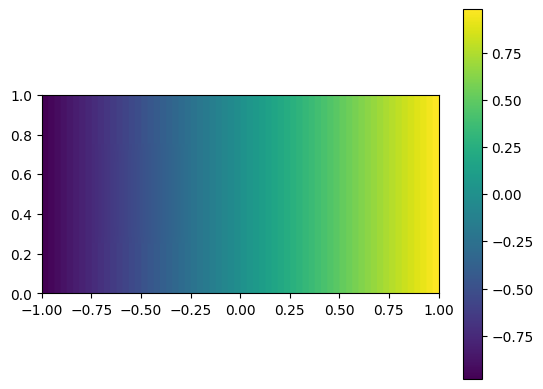

In [11]:
import matplotlib.pyplot as plt 
plt.imshow(frb, extent=extent, origin='lower')
plt.colorbar()

yt : [INFO     ] 2024-04-05 11:16:32,657 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,658 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,658 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-04-05 11:16:32,659 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,660 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,660 Making a fixed resolution buffer of (('index', 'xvals')) 800 by 800
yt : [INFO     ] 2024-04-05 11:16:32,738 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,738 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,738 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-04-05 11:16:32,740 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,740 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:32,740 Making a fixed resolution buffer of (('index', 'xvals')) 800 by 800


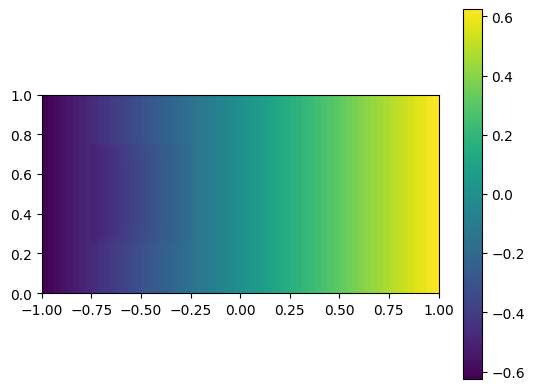

In [12]:
frb, extent = theta_normal_slice_composite(ds, ('index', 'xvals'), np.pi/4)
plt.imshow(frb, extent=extent, origin='lower')
plt.colorbar()

To understand the viewing angle, make a plot in each quadrant

yt : [INFO     ] 2024-04-05 11:16:57,502 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:57,502 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:57,502 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-04-05 11:16:57,504 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:57,504 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:57,505 Making a fixed resolution buffer of (('index', 'xvals')) 800 by 800
yt : [INFO     ] 2024-04-05 11:16:57,649 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:57,650 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:57,650 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-04-05 11:16:57,651 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:57,652 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-04-05 11:16:57,652 Making a fixed resolution buffer of (('index', 'xvals')) 800 by 800
yt : [INFO     ] 2024-04-05 11:16:57,761 xlim = 0.000000 1.000000
yt : [

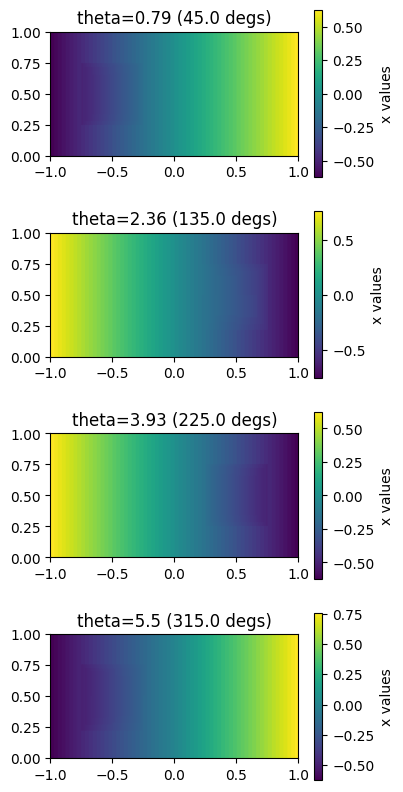

In [14]:
theta_0 = np.pi/4
fig, axs = plt.subplots(nrows = 4, ncols=1, figsize=(4,10))
for id, theta_offset in enumerate(np.arange(4) * np.pi/2):
    theta_val = theta_0 + theta_offset
    frb, extent = theta_normal_slice_composite(ds, ('index', 'xvals'), theta_val)
    im = axs[id].imshow(frb, extent=extent, origin='lower')
    th_title = f"theta={np.round(theta_val,2)} ({np.round(theta_val*180/np.pi,2)} degs)"
    axs[id].set_title(th_title)
    plt.colorbar(im, ax=axs[id], label='x values')